### Árvore Filogenética

In [2]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

Ler arquivo contendo Alinhamento Múltiplo

In [6]:
aln_GH20 = AlignIO.read("MSA_GH20.sth", "stockholm")

print(f"Alignment: \n {aln_GH20} \n ####################")

Alignment: 
 Alignment with 12 rows and 1991 columns
---------------------MRPHRARAALGGLLATATLLGLS...--- Bifidobacterium_samirii
---------------------MQLKGIRRALGGIIAAATLLSIG...--- Bifidobacterium_aerophilum
---------------------MRTRSLRQALGGIIAAATLLGVG...SAR Bifidobacterium_jacchi
---------------------MRLQKLRKAISSIAAAATLLGVG...--- Bifidobacterium_leontopitheci
---------------------MRLRRVKAAIGSVLAAVTLLSMS...--- Bifidobacterium_bifidum
---------------------MRLRRVKAAIGSVLAAVTLLSTS...--- Bifidobacteriaceae_bacterium_MCC01958
------------------------MKRKKLISILLTTVIVANFI...--- Clostridium_tertium
MNERGILWSFLAILCRKGKEIKRRMKKKQVVSGLLATVMIANIA...--- Clostridium_nexile
------------------------MKKKQVVSGLLATVMIANIA...--- Coprococcus_phoceensis
------------------------MNKKQGVIGLVATVMIANAA...--- Catenibacterium_mitsuokai
------------------------MNKKQGVIGLVATVMIANAA...--- Coprobacillus_sp._K06
------------------------MNKKQGVIGLVATVMIANAA...--- Catenibacterium_tridentinum 
 ####################


Cálculo da matriz de distâncias a partir do alinhamento. Usando a matriz “blosum62”.

In [7]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(aln_GH20)
print(f"Distance matrix: \n{dm} \n ##########################")

Distance matrix: 
Bifidobacterium_samirii 0.000000
Bifidobacterium_aerophilum  0.464491    0.000000
Bifidobacterium_jacchi  0.460668    0.271875    0.000000
Bifidobacterium_leontopitheci   0.433543    0.354584    0.368451    0.000000
Bifidobacterium_bifidum 0.365886    0.408894    0.386199    0.358937    0.000000
Bifidobacteriaceae_bacterium_MCC01958   0.365045    0.407536    0.385593    0.357495    0.003227    0.000000
Clostridium_tertium 0.457789    0.510554    0.503242    0.484739    0.434245    0.433993    0.000000
Clostridium_nexile  0.475951    0.488905    0.498768    0.492042    0.452111    0.451025    0.406958    0.000000
Coprococcus_phoceensis  0.475018    0.488635    0.498766    0.494394    0.450193    0.449105    0.408348    0.010617    0.000000
Catenibacterium_mitsuokai   0.479591    0.495146    0.499823    0.491008    0.447736    0.446291    0.402876    0.184899    0.185240    0.000000
Coprobacillus_sp._K06   0.473709    0.489861    0.500000    0.486885    0.445073    0.44

#### Cálculo da Árvore Filogenética

Algoritmo UPGMA

In [8]:
constructor_GH20 = DistanceTreeConstructor()

upgmatree_GH20 = constructor_GH20.upgma(dm)

print(f"UPGMA tree: \n{upgmatree_GH20} \n ###################")

#salvar os arquivos

Phylo.write(upgmatree_GH20, "upgma_gh20.nwk", "newick")

UPGMA tree: 
Tree(rooted=True)
    Clade(branch_length=0, name='Inner11')
        Clade(branch_length=0.03514084964170833, name='Inner9')
            Clade(branch_length=0.10944499069379156, name='Inner5')
                Clade(branch_length=0.07515237733210532, name='Inner4')
                    Clade(branch_length=0.011854673641118973, name='Inner3')
                        Clade(branch_length=0.005856265635660662, name='Catenibacterium_tridentinum')
                        Clade(branch_length=0.005856265635660662, name='Coprobacillus_sp._K06')
                    Clade(branch_length=0.017710939276779636, name='Catenibacterium_mitsuokai')
                Clade(branch_length=0.08755498139316324, name='Inner2')
                    Clade(branch_length=0.005308335215721716, name='Coprococcus_phoceensis')
                    Clade(branch_length=0.005308335215721716, name='Clostridium_nexile')
            Clade(branch_length=0.20230830730267652, name='Clostridium_tertium')
        Clade(br

1

Algorítmo Neighbor-Joining

In [9]:
njtree_GH20 = constructor_GH20.nj(dm)

print(f"NJ tree: \n{njtree_GH20} \n #########################")

#Salvar arquivo

Phylo.write(njtree_GH20, "nj.nwk_gh20", "newick")

NJ tree: 
Tree(rooted=False)
    Clade(branch_length=0, name='Inner10')
        Clade(branch_length=0.014900339438891103, name='Inner9')
            Clade(branch_length=0.06173534526273938, name='Inner7')
                Clade(branch_length=0.11281022887438463, name='Inner5')
                    Clade(branch_length=0.07440460385785427, name='Inner4')
                        Clade(branch_length=0.010530033546531425, name='Inner3')
                            Clade(branch_length=0.0056600596531148906, name='Catenibacterium_tridentinum')
                            Clade(branch_length=0.006052471618206434, name='Coprobacillus_sp._K06')
                        Clade(branch_length=0.019035579371367184, name='Catenibacterium_mitsuokai')
                    Clade(branch_length=0.08830275486741429, name='Inner2')
                        Clade(branch_length=0.005399487322709368, name='Coprococcus_phoceensis')
                        Clade(branch_length=0.005217183108734064, name='Clostridium_ne

1

Ler as árvores pelo módulo Phylo

In [ ]:
import matplotlib.pyplot as plt

UPGMA tree: 


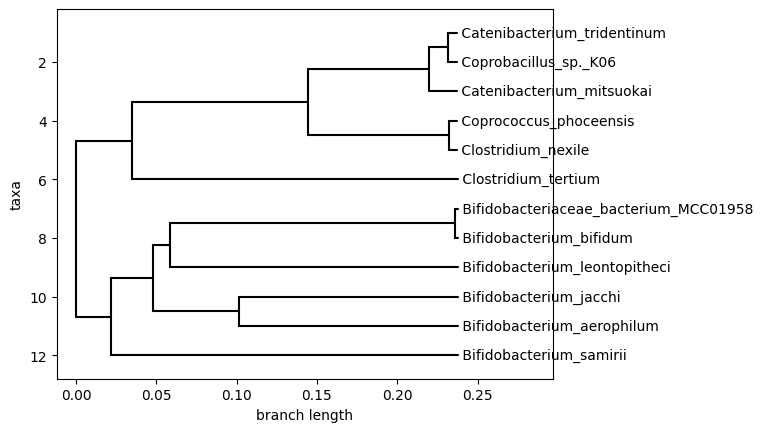

NJ tree: 


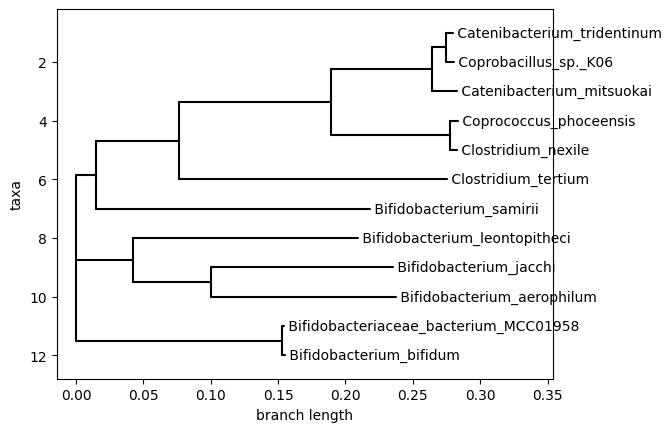

In [10]:
upgmatree_GH20 = Phylo.read("upgma_gh20.nwk", "newick")
njtree_GH20 = Phylo.read("nj.nwk_gh20", "newick")

for clade in upgmatree_GH20.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

for clade in njtree_GH20.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

print(f"UPGMA tree: ")
Phylo.draw(upgmatree_GH20)
print(f"NJ tree: ")
Phylo.draw(njtree_GH20)